In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import os
import requests

print(os.getcwd())

C:\Users\paulv


In [7]:
pd.set_option('display.max_colwidth', None)
data = pd.read_csv("D:/CSE635 - NLP/SocialUnrestPrediction/project_2_data/project_2_data/task_1/task_1_information_extraction_train.tsv", delimiter='\t')

In [8]:
for col in data.columns:
  print(col)

NOTES
EVENT_DATE
SOURCE
FATALITIES
EVENT_TYPE
SUB_EVENT_TYPE
ACTOR1
INTER1
ACTOR2
INTER2
INTERACTION
LOCATION


In [9]:
print(data['NOTES'][0])
print(data['EVENT_DATE'][0])

Three people were killed while 27 others injured when a Peshawar-bound train hit a bomb planted by unidentified militants on railway tracks in Tul town in Jacobabad district in Sindh.
29-August-2012


In [10]:
data.head(3).T

,0,1,2
NOTES,Three people were killed while 27 others injured when a Peshawar-bound train hit a bomb planted by unidentified militants on railway tracks in Tul town in Jacobabad district in Sindh.,Government security forces opened fire at a private residential house in Berdale neighbourhood (Baidoa) in the evening of 03/05. The motive behind the shooting is currently unclear. The house belongs to a local businessman but was not in at the time of the shooting.,Al Shabaab forces attacked government forces backed by Ethiopian forces.
EVENT_DATE,29-August-2012,03-May-2014,01-May-2012
SOURCE,Statesman (Pakistan),Undisclosed Source,All Africa
FATALITIES,3,0,11
EVENT_TYPE,Explosions/Remote violence,Violence against civilians,Battles
SUB_EVENT_TYPE,Remote explosive/landmine/IED,Attack,Armed clash
ACTOR1,Unidentified Armed Group (Pakistan),Military Forces of Somalia (2012-2017),Al Shabaab
INTER1,3,1,2
ACTOR2,Civilians (Pakistan),Civilians (Somalia),Military Forces of Somalia (2004-2012)
INTER2,7,7,1


In [11]:
df1 = data[['EVENT_TYPE', 'NOTES']].copy()

In [12]:
df1 = df1[pd.notnull(df1['NOTES'])]

In [13]:
df1.columns = ['EVENT_TYPE', 'NOTES']

In [14]:
print(df1.shape)
df1.head(3).T

(97109, 2)


,0,1,2
EVENT_TYPE,Explosions/Remote violence,Violence against civilians,Battles
NOTES,Three people were killed while 27 others injured when a Peshawar-bound train hit a bomb planted by unidentified militants on railway tracks in Tul town in Jacobabad district in Sindh.,Government security forces opened fire at a private residential house in Berdale neighbourhood (Baidoa) in the evening of 03/05. The motive behind the shooting is currently unclear. The house belongs to a local businessman but was not in at the time of the shooting.,Al Shabaab forces attacked government forces backed by Ethiopian forces.


In [15]:
pd.DataFrame(df1.EVENT_TYPE.unique()).values


array([['Explosions/Remote violence'],
       ['Violence against civilians'],
       ['Battles'],
       ['Strategic developments'],
       ['Riots'],
       ['Protests']], dtype=object)

In [16]:
df2 = df1.sample(30000, random_state=1).copy()
df2['category_id'] = df2['EVENT_TYPE'].factorize()[0]
category_id_df = df2[['EVENT_TYPE', 'category_id']].drop_duplicates()

In [17]:
df2.head(3).T

,60287,66832,86133
EVENT_TYPE,Riots,Battles,Battles
NOTES,Students and police clashed in Medenine. Police resorted to teargas after being assaulted by pupils who threw stones on a car of the security forces.,A serving personnel of the Nigerian Security and Civil Defence Corps (NSCDC) in Apa Local Government Area of Benue State was shot to death by unknown gunmen while at his home. The injuries on the deceaseds body suggest that he may have struggled with his assailants before he was over powered. The reasons for the attack are unknown.,Mayi Mayi Militia (Yakutumba) clashed with FARDC in Fizi. 1 Mayi Mayi & 1 FARDC killed.
category_id,0,1,1


In [18]:
df2['category_id'] = df2['EVENT_TYPE'].factorize()[0]
category_id_df = df2[['EVENT_TYPE', 'category_id']].drop_duplicates()

In [19]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'EVENT_TYPE']].values)
# New dataframe
df2.head()

,EVENT_TYPE,NOTES,category_id
60287,Riots,Students and police clashed in Medenine. Police resorted to teargas after being assaulted by pupils who threw stones on a car of the security forces.,0
66832,Battles,A serving personnel of the Nigerian Security and Civil Defence Corps (NSCDC) in Apa Local Government Area of Benue State was shot to death by unknown gunmen while at his home. The injuries on the deceaseds body suggest that he may have struggled with his assailants before he was over powered. The reasons for the attack are unknown.,1
86133,Battles,Mayi Mayi Militia (Yakutumba) clashed with FARDC in Fizi. 1 Mayi Mayi & 1 FARDC killed.,1
440,Protests,A large number of Sindh University employees and teachers staged a protest demonstration against the reinstatement of SU VC in Karachi.,2
85559,Battles,"Three policemen and a local volunteer were killed in an encounter with the kidnappers of two police guards and the driver of a private security company in Karbogha, Hangu district when they were returning with money from the bank.",1


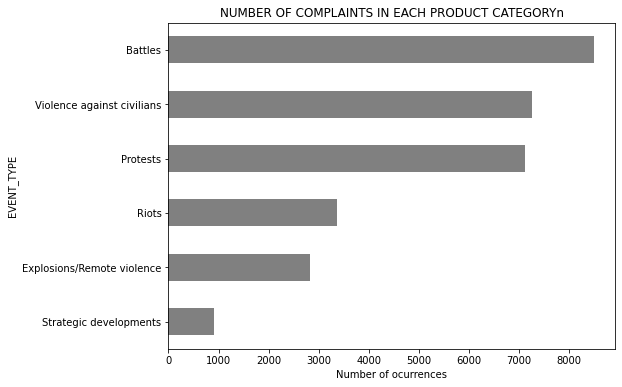

In [20]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('EVENT_TYPE').NOTES.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORYn')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [21]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(df2.NOTES).toarray()
labels = df2.category_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 30000 complaints is represented by 20600 features (TF-IDF score of unigrams and bigrams)


In [22]:
# Finding the three most correlated terms with each of the product categories
N = 3
for EVENT_TYPE, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(EVENT_TYPE))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Battles:
  * Most Correlated Unigrams are: soldiers, forces, fighting
  * Most Correlated Bigrams are: attacks ethiopian, militants killed, soldiers killed


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Explosions/Remote violence:
  * Most Correlated Unigrams are: exploded, grenade, bomb
  * Most Correlated Bigrams are: bomb blast, bomb exploded, grenade attack


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Protests:
  * Most Correlated Unigrams are: demonstration, staged, protest
  * Most Correlated Bigrams are: held protest, protest demonstration, staged protest


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Riots:
  * Most Correlated Unigrams are: stones, mob, rioters
  * Most Correlated Bigrams are: vigilante mob, tear gas, injured clash


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Strategic developments:
  * Most Correlated Unigrams are: destruction, agreement, looting
  * Most Correlated Bigrams are: non violent, property destruction, movement forces
n==> Violence against civilians:
  * Most Correlated Unigrams are: gunmen, civilians, shot
  * Most Correlated Bigrams are: unidentified gunmen, shot killed, shot dead


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
X = df2['NOTES'] # Collection of documents
y = df2['EVENT_TYPE'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [24]:
models = [
    LogisticRegression(random_state=0)
]

In [25]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [26]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

D:\Tools\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Tools\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

In [27]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LogisticRegression,0.866633,0.004393


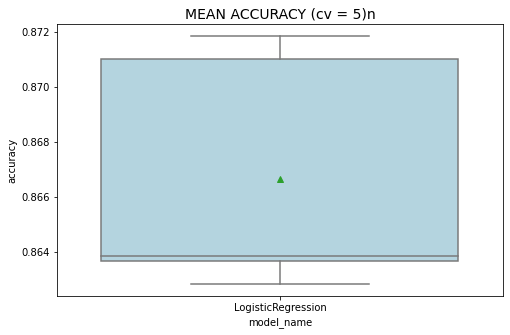

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

In [34]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
print('CLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['EVENT_TYPE'].unique()))

ttttCLASSIFICATIION METRICSn
                            precision    recall  f1-score   support

                     Riots       0.83      0.76      0.79       837
                   Battles       0.86      0.86      0.86      2151
                  Protests       0.94      0.96      0.95      1753
Violence against civilians       0.83      0.87      0.85      1830
Explosions/Remote violence       0.89      0.90      0.89       704
    Strategic developments       0.97      0.68      0.80       225

                  accuracy                           0.87      7500
                 macro avg       0.89      0.84      0.86      7500
              weighted avg       0.87      0.87      0.87      7500



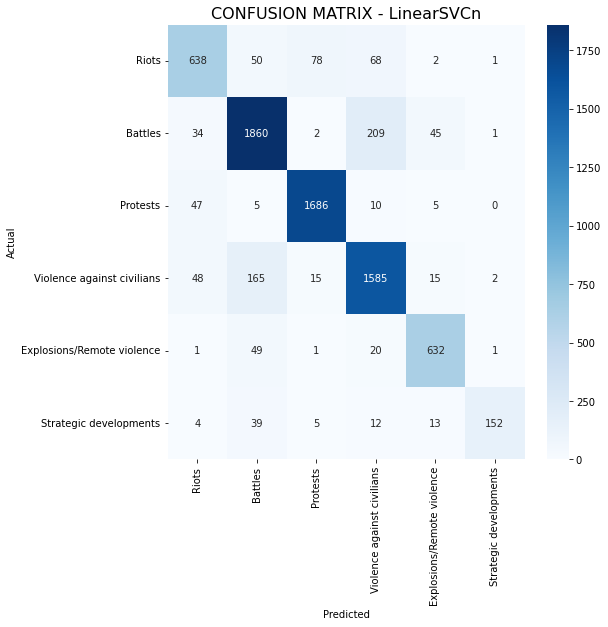

In [37]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.EVENT_TYPE.values, 
            yticklabels=category_id_df.EVENT_TYPE.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

In [38]:
#PREDICTION
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [39]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

In [40]:
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [41]:
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [45]:
note='AMISOM/Somali forces clash with al Shabaab in Kulbiyow sub-district in the Lower Juba region. The clash lasted for several hours; causalities not yet known.'
print(model.predict(fitted_vectorizer.transform([note])))

['Battles']


In [48]:
#SAVE MODEL
filename = 'NLP_TASK1_EVENT_TYPE_CLASSIFICATION_MODEL.sav'
pickle.dump(model, open(filename, 'wb'))

In [51]:
filename = 'D:/CSE635 - NLP/SocialUnrestPrediction/task1/NLP_TASK1_EVENT_TYPE_CLASSIFICATION_MODEL.sav'
loaded_model_event_type_classifier = pickle.load(open(filename, 'rb'))
note='AMISOM/Somali forces clash with al Shabaab in Kulbiyow sub-district in the Lower Juba region. The clash lasted for several hours; causalities not yet known.'
print(loaded_model_event_type_classifier.predict(fitted_vectorizer.transform([note])))

['Battles']


In [ ]:
#SUB EVENT TYPE CLASSIFIER

In [52]:
se_df1 = data[['SUB_EVENT_TYPE', 'NOTES']].copy()

In [54]:
se_df1 = se_df1[pd.notnull(se_df1['NOTES'])]

In [56]:
se_df1.columns = ['SUB_EVENT_TYPE', 'NOTES']

In [57]:
print(se_df1.shape)
se_df1.head(3).T

(97109, 2)


,0,1,2
SUB_EVENT_TYPE,Remote explosive/landmine/IED,Attack,Armed clash
NOTES,Three people were killed while 27 others injured when a Peshawar-bound train hit a bomb planted by unidentified militants on railway tracks in Tul town in Jacobabad district in Sindh.,Government security forces opened fire at a private residential house in Berdale neighbourhood (Baidoa) in the evening of 03/05. The motive behind the shooting is currently unclear. The house belongs to a local businessman but was not in at the time of the shooting.,Al Shabaab forces attacked government forces backed by Ethiopian forces.


In [59]:
pd.DataFrame(se_df1.SUB_EVENT_TYPE.unique()).values

array([['Remote explosive/landmine/IED'],
       ['Attack'],
       ['Armed clash'],
       ['Agreement'],
       ['Violent demonstration'],
       ['Peaceful protest'],
       ['Mob violence'],
       ['Sexual violence'],
       ['Protest with intervention'],
       ['Arrests'],
       ['Grenade'],
       ['Abduction/forced disappearance'],
       ['Disrupted weapons use'],
       ['Government regains territory'],
       ['Air/drone strike'],
       ['Non-state actor overtakes territory'],
       ['Excessive force against protesters'],
       ['Shelling/artillery/missile attack'],
       ['Suicide bomb'],
       ['Headquarters or base established'],
       ['Looting/property destruction'],
       ['Change to group/activity'],
       ['Non-violent transfer of territory'],
       ['Other'],
       ['Chemical weapon']], dtype=object)

In [63]:
se_df2 = se_df1.sample(30000, random_state=1).copy()
se_df2['category_id'] = se_df2['SUB_EVENT_TYPE'].factorize()[0]
se_category_id_df = se_df2[['SUB_EVENT_TYPE', 'category_id']].drop_duplicates()

In [64]:
se_df2.head(3).T

,60287,66832,86133
SUB_EVENT_TYPE,Mob violence,Armed clash,Armed clash
NOTES,Students and police clashed in Medenine. Police resorted to teargas after being assaulted by pupils who threw stones on a car of the security forces.,A serving personnel of the Nigerian Security and Civil Defence Corps (NSCDC) in Apa Local Government Area of Benue State was shot to death by unknown gunmen while at his home. The injuries on the deceaseds body suggest that he may have struggled with his assailants before he was over powered. The reasons for the attack are unknown.,Mayi Mayi Militia (Yakutumba) clashed with FARDC in Fizi. 1 Mayi Mayi & 1 FARDC killed.
category_id,0,1,1


In [65]:
se_df2['category_id'] = se_df2['SUB_EVENT_TYPE'].factorize()[0]
category_id_df = se_df2[['SUB_EVENT_TYPE', 'category_id']].drop_duplicates()

In [66]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'SUB_EVENT_TYPE']].values)
# New dataframe
se_df2.head()

,SUB_EVENT_TYPE,NOTES,category_id
60287,Mob violence,Students and police clashed in Medenine. Police resorted to teargas after being assaulted by pupils who threw stones on a car of the security forces.,0
66832,Armed clash,A serving personnel of the Nigerian Security and Civil Defence Corps (NSCDC) in Apa Local Government Area of Benue State was shot to death by unknown gunmen while at his home. The injuries on the deceaseds body suggest that he may have struggled with his assailants before he was over powered. The reasons for the attack are unknown.,1
86133,Armed clash,Mayi Mayi Militia (Yakutumba) clashed with FARDC in Fizi. 1 Mayi Mayi & 1 FARDC killed.,1
440,Peaceful protest,A large number of Sindh University employees and teachers staged a protest demonstration against the reinstatement of SU VC in Karachi.,2
85559,Armed clash,"Three policemen and a local volunteer were killed in an encounter with the kidnappers of two police guards and the driver of a private security company in Karbogha, Hangu district when they were returning with money from the bank.",1


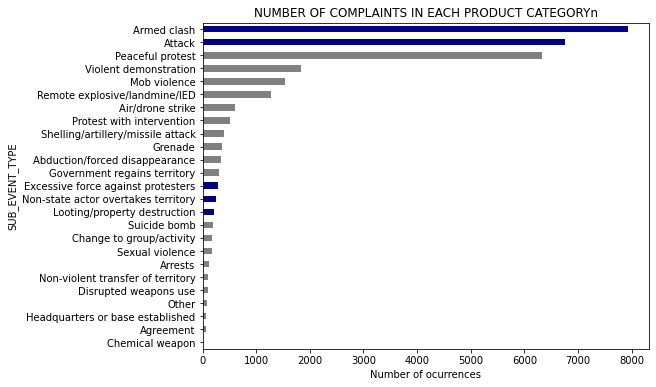

In [67]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
se_df2.groupby('SUB_EVENT_TYPE').NOTES.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORYn')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [68]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(se_df2.NOTES).toarray()
labels = se_df2.category_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 30000 complaints is represented by 20600 features (TF-IDF score of unigrams and bigrams)


In [69]:
# Finding the three most correlated terms with each of the product categories
N = 3
for SUB_EVENT_TYPE, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(SUB_EVENT_TYPE))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Abduction/forced disappearance:
  * Most Correlated Unigrams are: released, abducted, kidnapped
  * Most Correlated Bigrams are: kidnapped unidentified, civilians captured, civilians capture


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Agreement:
  * Most Correlated Unigrams are: agreed, surrendered, agreement
  * Most Correlated Bigrams are: peace agreement, rebels surrender, surrendered fardc


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Air/drone strike:
  * Most Correlated Unigrams are: air, airstrike, drone
  * Most Correlated Bigrams are: drone strike, saf bomb, conducted airstrike


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Armed clash:
  * Most Correlated Unigrams are: soldiers, clashes, fighting
  * Most Correlated Bigrams are: attacks ethiopian, soldiers killed, militants killed


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Arrests:
  * Most Correlated Unigrams are: overthrow, arrested, arrests
  * Most Correlated Bigrams are: police arrested, arrests security, arrests police


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Attack:
  * Most Correlated Unigrams are: gunmen, civilians, shot
  * Most Correlated Bigrams are: unidentified gunmen, shot killed, shot dead


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Change to group/activity:
  * Most Correlated Unigrams are: movement, recruitment, measures
  * Most Correlated Bigrams are: change armed, security measures, movement forces


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Chemical weapon:
  * Most Correlated Unigrams are: marrah, poisonous, paralysed
  * Most Correlated Bigrams are: forces slm, rebel positions, civilian injuries


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Disrupted weapons use:
  * Most Correlated Unigrams are: seizure, defused, defusal
  * Most Correlated Bigrams are: nepal army, forces defused, weapons seizure


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Excessive force against protesters:
  * Most Correlated Unigrams are: agenda, grand, protester
  * Most Correlated Bigrams are: forces allegedly, allegedly shot, killed protester


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Government regains territory:
  * Most Correlated Unigrams are: recaptured, regain, regained
  * Most Correlated Bigrams are: fardc regained, regain control, regained control


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Grenade:
  * Most Correlated Unigrams are: hurled, hand, grenade
  * Most Correlated Bigrams are: hurled hand, hand grenade, grenade attack


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Headquarters or base established:
  * Most Correlated Unigrams are: vets, bases, base
  * Most Correlated Bigrams are: war veterans, war vets, established base


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Looting/property destruction:
  * Most Correlated Unigrams are: property, destruction, looting
  * Most Correlated Bigrams are: looting suspected, destruction zanu, property destruction


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Mob violence:
  * Most Correlated Unigrams are: lynched, vigilante, mob
  * Most Correlated Bigrams are: angry mob, injured clash, vigilante mob


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Non-state actor overtakes territory:
  * Most Correlated Unigrams are: captured, garrison, control
  * Most Correlated Bigrams are: rebel forces, captured government, mutinied unpaid


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Non-violent transfer of territory:
  * Most Correlated Unigrams are: control, deployment, vacated
  * Most Correlated Bigrams are: took village, somali amisom, took control


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Other:
  * Most Correlated Unigrams are: non, violent, activity
  * Most Correlated Bigrams are: activity police, non violent, violent activity


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Peaceful protest:
  * Most Correlated Unigrams are: demonstration, staged, protest
  * Most Correlated Bigrams are: held protest, protest demonstration, staged protest


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Protest with intervention:
  * Most Correlated Unigrams are: protesters, arrested, dispersed
  * Most Correlated Bigrams are: used water, police detained, police dispersed


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Remote explosive/landmine/IED:
  * Most Correlated Unigrams are: blast, ied, bomb
  * Most Correlated Bigrams are: explosive device, bomb blast, bomb exploded


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Sexual violence:
  * Most Correlated Unigrams are: rape, rapes, raped
  * Most Correlated Bigrams are: women targeted, raped women, targeted girls


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Shelling/artillery/missile attack:
  * Most Correlated Unigrams are: landed, shell, mortar
  * Most Correlated Bigrams are: mortar shells, fired mortar, mortar rounds


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Suicide bomb:
  * Most Correlated Unigrams are: bombers, bomber, suicide
  * Most Correlated Bigrams are: suicide bombers, suicide attack, suicide bomber
n==> Violent demonstration:
  * Most Correlated Unigrams are: tyres, rioters, riot
  * Most Correlated Bigrams are: clashed police, tear gas, service delivery


D:\Tools\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
X = se_df2['NOTES'] # Collection of documents
y = se_df2['SUB_EVENT_TYPE'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [71]:
models = [
    LogisticRegression(random_state=0)
]

In [72]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [73]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

D:\Tools\Python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
D:\Tools\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Tools\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.

In [74]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LogisticRegression,0.794333,0.003984


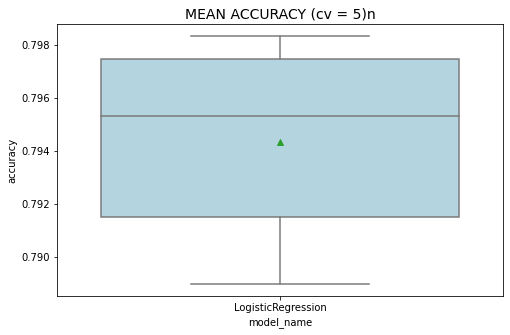

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

In [76]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               se_df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [77]:
print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= se_df2['SUB_EVENT_TYPE'].unique()))

ttttCLASSIFICATIION METRICSn
                                     precision    recall  f1-score   support

                       Mob violence       0.78      0.62      0.69       409
                        Armed clash       0.81      0.85      0.83      2008
                   Peaceful protest       0.93      0.97      0.95      1570
                             Attack       0.79      0.86      0.82      1694
                    Sexual violence       0.97      0.75      0.85        44
              Violent demonstration       0.71      0.70      0.71       428
      Remote explosive/landmine/IED       0.89      0.92      0.90       309
       Looting/property destruction       0.97      0.67      0.79        51
                          Agreement       0.95      0.80      0.87        25
                            Grenade       0.79      0.90      0.85        94
                   Air/drone strike       0.91      0.87      0.89       163
          Protest with intervention       0.58

D:\Tools\Python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Tools\Python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Tools\Python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


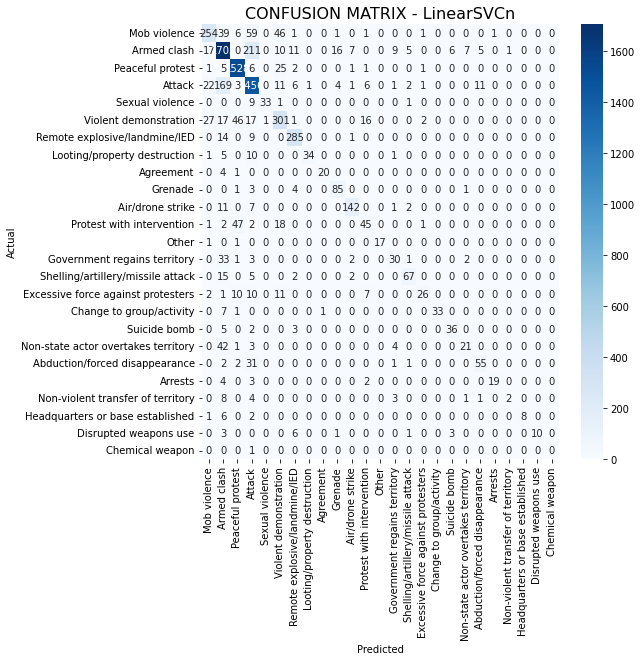

In [78]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.SUB_EVENT_TYPE.values, 
            yticklabels=category_id_df.SUB_EVENT_TYPE.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

In [79]:
#PREDICTION
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [80]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

In [81]:
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [82]:
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [83]:
note='AMISOM/Somali forces clash with al Shabaab in Kulbiyow sub-district in the Lower Juba region. The clash lasted for several hours; causalities not yet known.'
print(model.predict(fitted_vectorizer.transform([note])))

['Armed clash']


In [84]:
#SAVE MODEL
filename = 'NLP_TASK1_SUB_EVENT_TYPE_CLASSIFICATION_MODEL.sav'
pickle.dump(model, open(filename, 'wb'))

In [88]:
filename = 'D:/CSE635 - NLP/SocialUnrestPrediction/task1/NLP_TASK1_SUB_EVENT_TYPE_CLASSIFICATION_MODEL.sav'
loaded_model_sub_event_type_classifier = pickle.load(open(filename, 'rb'))
note='Al Shabaab members attack and kill two men transporting khat in an area between Baadhaade and Kulbiyow in Badhaade district.'
print(loaded_model_sub_event_type_classifier.predict(fitted_vectorizer.transform([note])))

['Attack']


In [154]:
EVENT_TYPE=''
SUB_EVENT_TYPE=''
FATALITIES=10000000
LOCATION=''
ACTOR1=''
INTER1=''
ACTOR2=''
INTER2=''
INTERACTION=''



In [176]:
sub_event_type_filename = 'D:/CSE635 - NLP/SocialUnrestPrediction/task1/NLP_TASK1_SUB_EVENT_TYPE_CLASSIFICATION_MODEL.sav'
event_type_filename = 'D:/CSE635 - NLP/SocialUnrestPrediction/task1/NLP_TASK1_EVENT_TYPE_CLASSIFICATION_MODEL.sav'
loaded_model_event_type_classifier = pickle.load(open(event_type_filename, 'rb'))
loaded_model_sub_event_type_classifier = pickle.load(open(sub_event_type_filename, 'rb'))
#note='Al Shabaab members attack and kill two men transporting khat in an area between Baadhaade and Kulbiyow in Badhaade district.'
note='On Saturday (24/01) assailants set a private car afire and blasted 16 crude bombs at Malibagh and Shyamoli in the capital.'
print('EVENT TYPE:', loaded_model_event_type_classifier.predict(fitted_vectorizer.transform([note]))[0])
print('SUB EVENT TYPE:', loaded_model_sub_event_type_classifier.predict(fitted_vectorizer.transform([note]))[0])

EVENT TYPE: Riots
SUB EVENT TYPE: Violent demonstration


In [156]:
#NER
##!python -m pip install --upgrade pip
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!pip install word2number

In [157]:
import spacy
from spacy import displacy
from word2number import w2n

NER = spacy.load("en_core_web_sm")

In [158]:
raw_text='Two are killed and several houses burnt over two non-consecutive days during a clash between the Ebira and Bassa kwomu speaking peoples Ikende.'
text1= NER(raw_text)
for word in text1.ents:
    print(word.text,word.label_)
    if word.label_ == 'CARDINAL':
        try:
            num = word.text
            num = w2n.word_to_num(num)
            if num < FATALITIES:
                FATALITIES = num
        except:
            print('error')
    if word.label_ == 'GPE':
        LOCATION = LOCATION + word.text + " "
#print('Word to Num', w2n.word_to_num("hello"))
LOCATION = LOCATION.strip()
EVENT_TYPE = loaded_model_event_type_classifier.predict(fitted_vectorizer.transform([raw_text]))[0]
SUB_EVENT_TYPE = loaded_model_sub_event_type_classifier.predict(fitted_vectorizer.transform([raw_text]))[0]
print('Event Type:', EVENT_TYPE)
print('SUB EVENT TYPE:', SUB_EVENT_TYPE)
print('Location:', LOCATION)
print('FATALITIES:', FATALITIES)

Two CARDINAL
two CARDINAL
non-consecutive days DATE
Ebira PRODUCT
Bassa kwomu PERSON
Ikende ORG

Event Type: Battles
SUB EVENT TYPE: Armed clash
Event date: non-consecutive days
Location: 
FATALITIES: 2


In [ ]:
#INTER1
!pip install transformers -q

# Load a spacy model and chekc if it has ner
import spacy
nlp=spacy.load('en_core_web_sm')

from transformers import BertModel, BertTokenizerFast
import torch
import torch.nn as nn
from sklearn.datasets import fetch_20newsgroups
from pprint import  pprint
import re
from collections import Counter
import pandas as pd

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nlp.pipe_names

#> ['tagger', 'parser', 'ner']



import pandas as pd

ls

train = pd.read_csv('task_1_information_extraction_train.tsv', sep='\t').dropna(subset = ["NOTES", "INTER1"])#.sample(frac = 0.1)

categories = list(range(1, 9))
X_train = train["NOTES"].values
Y_train = train["INTER1"].values -1

test = pd.read_csv('task_1_information_extraction_valid.tsv', sep='\t').dropna(subset = ["NOTES", "INTER1"])


X_test = test["NOTES"].values
Y_test = test["INTER1"].values-1 


#from sklearn.feature_extraction.text import TfidfVectorizer
#Vectorizer = TfidfVectorizer()
#X = Vectorizer.fit_transform(X)


#remove stopwords to change sparsematrix (with 0s)

#Y.nunique()



tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

train_enc = tokenizer.batch_encode_plus(list(X_train), padding="longest", truncation=True, max_length=128, return_tensors="pt")
test_enc = tokenizer.batch_encode_plus(list(X_test), padding="longest", truncation=True, max_length=128, return_tensors="pt")

train_input_ids, train_type_ids, train_attn_mask = train_enc.input_ids, train_enc.token_type_ids, train_enc.attention_mask
test_input_ids, test_type_ids, test_attn_mask = test_enc.input_ids, test_enc.token_type_ids, test_enc.attention_mask

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Below we define a function to create train, test & valid dataloaders in Pytorch

batch_size = 32

def get_dataloader(input_ids, type_ids, attn_mask, y):
    data = TensorDataset(input_ids, type_ids, attn_mask, y)
    sampler = RandomSampler(data)
    dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)
    return dataloader

train_datalaoder = get_dataloader(train_input_ids, train_type_ids, train_attn_mask, torch.tensor(Y_train))
test_datalaoder = get_dataloader(test_input_ids, test_type_ids, test_attn_mask, torch.tensor(Y_test))

class BERTClassifier(nn.Module):
  def __init__(self, transformer):
    super().__init__()
    self.transformer = transformer
    self.linear = nn.Linear(768, 8)
  
  def forward(self, in_ids, type_ids, attn_mask):
    op = self.transformer(input_ids=in_ids, attention_mask=attn_mask, 
                          token_type_ids=type_ids)
    
    return  self.linear(op["pooler_output"])

def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

transformer = BertModel.from_pretrained("bert-base-uncased")
model = BERTClassifier(transformer).to(device)
print(f'The model has {count_parameters(model):,} trainable parameters')

def train(model, dataloader, optimizer, criterion, clip=1.0):

    model.train()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    for ix, batch in tqdm(enumerate(dataloader)):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch
        
        optimizer.zero_grad()
        output = model(input_ids, type_ids, attn_mask)     
        loss = criterion(output, y)
        loss.backward()

        #gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        ep_t_loss += loss.item()
        batch_num += 1
        pred.extend(torch.argmax(output, -1).tolist())
        tgt.extend(y.tolist())

    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro')

# Evaluation function: Calculates loss on the validation data.
from sklearn import metrics

def evaluate(model, dataloader, criterion):

    model.eval()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    for ix, batch in enumerate(dataloader):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch

        with torch.no_grad():
            output = model(input_ids, type_ids, attn_mask)
            
            loss = criterion(output, y)

            ep_t_loss += loss.item()
            batch_num += 1
            pred.extend(torch.argmax(output, -1).tolist())
            tgt.extend(y.tolist())
        
    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro'), pred, tgt

criterion = torch.nn.CrossEntropyLoss()
optim = torch.optim.AdamW(model.parameters(), lr = 2e-5)

best_valid_loss = float('inf')
tot_t_loss, tot_v_loss =[],[]
N_EPOCHS = 2

import time
from tqdm.notebook import tqdm

for epoch in tqdm(range(N_EPOCHS)): 

    tr_l, tr_f1= train(model, train_datalaoder, optim, criterion)
    tot_t_loss.append(tr_l)

    val_l, val_f1, pred, tgt = evaluate(model, test_datalaoder, criterion)
    tot_v_loss.append(val_l)
    
    if val_l < best_valid_loss:
        best_valid_loss = val_l
        best_pred, best_tgt = pred, tgt
        torch.save(model.state_dict(), 'model_least_loss.pt')
        print("\nBest Model Saved !!")
    elif epoch % 3 == 0:
        torch.save(model.state_dict(), 'model_checkpoint_'+str(epoch)+'.pt')
        print("\Checkpoint Model Saved !!")
    print("\n")
    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Total Loss: {tr_l:.3f} | Train F1: {tr_f1:.3f}')
    print(f'\tVal. Total Loss: {val_l:.3f} | Valid F1: {val_f1:.3f}')
    print("_________________________________________________________________")

print(metrics.classification_report(best_tgt, best_pred))

In [ ]:
#INTER 2

!pip install transformers -q

# Load a spacy model and chekc if it has ner
import spacy
nlp=spacy.load('en_core_web_sm')

from transformers import BertModel, BertTokenizerFast
import torch
import torch.nn as nn
from sklearn.datasets import fetch_20newsgroups
from pprint import  pprint
import re
from collections import Counter
import pandas as pd

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nlp.pipe_names

#> ['tagger', 'parser', 'ner']

df_train["INTER2"].value_counts()

df_train = pd.read_csv('sample_data/task_1_information_extraction_train.tsv', sep='\t').dropna(subset = ["NOTES", "INTER2"])#.sample(frac = 0.1)

categories = list(range(1, 9))
X_train = df_train["NOTES"].values
Y_train = df_train["INTER2"].values 

df_test = pd.read_csv('sample_data/task_1_information_extraction_valid.tsv', sep='\t').dropna(subset = ["NOTES", "INTER2"])


X_test = df_test["NOTES"].values
Y_test = df_test["INTER2"].values


#from sklearn.feature_extraction.text import TfidfVectorizer
#Vectorizer = TfidfVectorizer()
#X = Vectorizer.fit_transform(X)


#remove stopwords to change sparsematrix (with 0s)

#Y.nunique()



tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

train_enc = tokenizer.batch_encode_plus(list(X_train), padding="longest", truncation=True, max_length=128, return_tensors="pt")
test_enc = tokenizer.batch_encode_plus(list(X_test), padding="longest", truncation=True, max_length=128, return_tensors="pt")

train_input_ids, train_type_ids, train_attn_mask = train_enc.input_ids, train_enc.token_type_ids, train_enc.attention_mask
test_input_ids, test_type_ids, test_attn_mask = test_enc.input_ids, test_enc.token_type_ids, test_enc.attention_mask

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Below we define a function to create train, test & valid dataloaders in Pytorch

batch_size = 32

def get_dataloader(input_ids, type_ids, attn_mask, y):
    data = TensorDataset(input_ids, type_ids, attn_mask, y)
    sampler = RandomSampler(data)
    dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)
    return dataloader

train_datalaoder = get_dataloader(train_input_ids, train_type_ids, train_attn_mask, torch.tensor(Y_train))
test_datalaoder = get_dataloader(test_input_ids, test_type_ids, test_attn_mask, torch.tensor(Y_test))

class BERTClassifier(nn.Module):
  def __init__(self, transformer):
    super().__init__()
    self.transformer = transformer
    self.linear = nn.Linear(768, 9)
  
  def forward(self, in_ids, type_ids, attn_mask):
    op = self.transformer(input_ids=in_ids, attention_mask=attn_mask, 
                          token_type_ids=type_ids)
    
    return  self.linear(op["pooler_output"])

def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

transformer = BertModel.from_pretrained("bert-base-uncased")
model = BERTClassifier(transformer).to(device)
print(f'The model has {count_parameters(model):,} trainable parameters')

def train(model, dataloader, optimizer, criterion, clip=1.0):

    model.train()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    for ix, batch in tqdm(enumerate(dataloader)):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch
        
        optimizer.zero_grad()
        output = model(input_ids, type_ids, attn_mask)     
        loss = criterion(output, y)
        loss.backward()

        #gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        ep_t_loss += loss.item()
        batch_num += 1
        pred.extend(torch.argmax(output, -1).tolist())
        tgt.extend(y.tolist())

    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro')

# Evaluation function: Calculates loss on the validation data.
from sklearn import metrics

def evaluate(model, dataloader, criterion):

    model.eval()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    for ix, batch in enumerate(dataloader):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch

        with torch.no_grad():
            output = model(input_ids, type_ids, attn_mask)
            
            loss = criterion(output, y)

            ep_t_loss += loss.item()
            batch_num += 1
            pred.extend(torch.argmax(output, -1).tolist())
            tgt.extend(y.tolist())
        
    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro'), pred, tgt

criterion = torch.nn.CrossEntropyLoss()
optim = torch.optim.AdamW(model.parameters(), lr = 2e-5)

best_valid_loss = float('inf')
tot_t_loss, tot_v_loss =[],[]
N_EPOCHS = 2

import time
from tqdm.notebook import tqdm

for epoch in tqdm(range(N_EPOCHS)): 

    tr_l, tr_f1= train(model, train_datalaoder, optim, criterion)
    tot_t_loss.append(tr_l)

    val_l, val_f1, pred, tgt = evaluate(model, test_datalaoder, criterion)
    tot_v_loss.append(val_l)
    
    if val_l < best_valid_loss:
        best_valid_loss = val_l
        best_pred, best_tgt = pred, tgt
        torch.save(model.state_dict(), 'sample_data/model_least_loss.pt')
        print("\nBest Model Saved !!")
    elif epoch % 3 == 0:
        torch.save(model.state_dict(), 'sample_data/model_checkpoint_'+str(epoch)+'.pt')
        print("\Checkpoint Model Saved !!")
    print("\n")
    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Total Loss: {tr_l:.3f} | Train F1: {tr_f1:.3f}')
    print(f'\tVal. Total Loss: {val_l:.3f} | Valid F1: {val_f1:.3f}')
    print("_________________________________________________________________")

print(metrics.classification_report(best_tgt, best_pred))

In [ ]:
#INTERACTION

!pip install transformers -q

# Load a spacy model and chekc if it has ner
import spacy
nlp=spacy.load('en_core_web_sm')

from transformers import BertModel, BertTokenizerFast
import torch
import torch.nn as nn
from sklearn.datasets import fetch_20newsgroups
from pprint import  pprint
import re
from collections import Counter
import pandas as pd
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nlp.pipe_names

#> ['tagger', 'parser', 'ner']



import pandas as pd


train = pd.read_csv('sample_data/task_1_information_extraction_train.tsv', sep='\t').dropna(subset = ["NOTES", "INTERACTION"])
#.sample(frac = 0.1)

categories = list(range(1, 9))
X_train = train["NOTES"].values
Y_train = train["INTERACTION"]

test = pd.read_csv('sample_data/task_1_information_extraction_valid.tsv', sep='\t').dropna(subset = ["NOTES", "INTERACTION"])


X_test = test["NOTES"].values
Y_test = test["INTERACTION"]


#from sklearn.feature_extraction.text import TfidfVectorizer
#Vectorizer = TfidfVectorizer()
#X = Vectorizer.fit_transform(X)


#remove stopwords to change sparsematrix (with 0s)

train["INTERACTION"].value_counts()

class_to_idx = {x: i for i, x in enumerate(set(Y_train))}
idx_to_class = {val: key for key, val in class_to_idx.items()}

Y_train = Y_train.replace(class_to_idx).values
Y_test = Y_test.replace(class_to_idx).values

pd.Series(Y_test).value_counts()

pd.Series(Y_train).value_counts()

len(set(Y_test) - set(Y_train))

len(set(Y_train))

len(set(Y_test))

Y_test.shape

pd.Series(Y_train).value_counts()

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

train_enc = tokenizer.batch_encode_plus(list(X_train), padding="longest", truncation=True, max_length=128, return_tensors="pt")
test_enc = tokenizer.batch_encode_plus(list(X_test), padding="longest", truncation=True, max_length=128, return_tensors="pt")

train_input_ids, train_type_ids, train_attn_mask = train_enc.input_ids, train_enc.token_type_ids, train_enc.attention_mask
test_input_ids, test_type_ids, test_attn_mask = test_enc.input_ids, test_enc.token_type_ids, test_enc.attention_mask

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Below we define a function to create train, test & valid dataloaders in Pytorch

batch_size = 32

def get_dataloader(input_ids, type_ids, attn_mask, y):
    data = TensorDataset(input_ids, type_ids, attn_mask, y)
    sampler = RandomSampler(data)
    dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)
    return dataloader

train_datalaoder = get_dataloader(train_input_ids, train_type_ids, train_attn_mask, torch.tensor(Y_train))
test_datalaoder = get_dataloader(test_input_ids, test_type_ids, test_attn_mask, torch.tensor(Y_test))

class BERTClassifier(nn.Module):
  def __init__(self, transformer):
    super().__init__()
    self.transformer = transformer
    self.linear = nn.Linear(768, len(set(Y_train)))
  
  def forward(self, in_ids, type_ids, attn_mask):
    op = self.transformer(input_ids=in_ids, attention_mask=attn_mask, 
                          token_type_ids=type_ids)
    
    return  self.linear(op["pooler_output"])

def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

transformer = BertModel.from_pretrained("bert-base-uncased")
model = BERTClassifier(transformer).to(device)
print(f'The model has {count_parameters(model):,} trainable parameters')

len(train_datalaoder)

def train(model, dataloader, optimizer, criterion, clip=1.0):

    model.train()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    for ix, batch in tqdm(enumerate(dataloader), total=len(dataloader)):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch
        
        optimizer.zero_grad()
        output = model(input_ids, type_ids, attn_mask)     
        loss = criterion(output, y)
        loss.backward()

        #gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        ep_t_loss += loss.item()
        batch_num += 1
        pred.extend(torch.argmax(output, -1).tolist())
        tgt.extend(y.tolist())

    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro')

# Evaluation function: Calculates loss on the validation data.
from sklearn import metrics

def evaluate(model, dataloader, criterion):

    model.eval()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    for ix, batch in enumerate(dataloader):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch

        with torch.no_grad():
            output = model(input_ids, type_ids, attn_mask)
            
            loss = criterion(output, y)

            ep_t_loss += loss.item()
            batch_num += 1
            pred.extend(torch.argmax(output, -1).tolist())
            tgt.extend(y.tolist())
        
    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro'), pred, tgt

criterion = torch.nn.CrossEntropyLoss()
optim = torch.optim.AdamW(model.parameters(), lr = 2e-5)

best_valid_loss = float('inf')
tot_t_loss, tot_v_loss =[],[]
N_EPOCHS = 2

import time
from tqdm.notebook import tqdm

for epoch in range(N_EPOCHS): 

    tr_l, tr_f1= train(model, train_datalaoder, optim, criterion)
    tot_t_loss.append(tr_l)

    val_l, val_f1, pred, tgt = evaluate(model, test_datalaoder, criterion)
    tot_v_loss.append(val_l)
    
    if val_l < best_valid_loss:
        best_valid_loss = val_l
        best_pred, best_tgt = pred, tgt
        torch.save(model.state_dict(), 'sample_data/interaction_model_least_loss.pt')
        print("\nBest Model Saved !!")
    elif epoch % 3 == 0:
        torch.save(model.state_dict(), 'sample_data/interaction_model_checkpoint_'+str(epoch)+'.pt')
        print("\Checkpoint Model Saved !!")
    print("\n")
    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Total Loss: {tr_l:.3f} | Train F1: {tr_f1:.3f}')
    print(f'\tVal. Total Loss: {val_l:.3f} | Valid F1: {val_f1:.3f}')
    print("_________________________________________________________________")

print(metrics.classification_report(best_tgt, best_pred))

best_tgt_class = [idx_to_class[x] for x in best_tgt]
best_pred_class = [idx_to_class[x] for x in best_pred]

In [ ]:
#ACTOR1



#!pip install transformers -q

# Load a spacy model and chekc if it has ner
import spacy
nlp=spacy.load('en_core_web_sm')

from transformers import BertModel, BertTokenizerFast
import torch
import torch.nn as nn
from sklearn.datasets import fetch_20newsgroups
from pprint import  pprint
import re
from collections import Counter
import pandas as pd
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nlp.pipe_names

#> ['tagger', 'parser', 'ner']



import pandas as pd

train = pd.read_csv('task_1_information_extraction_train.tsv', sep='\t').dropna(subset = ["NOTES", "ACTOR1"])
#.sample(frac = 0.1)

categories = list(range(1, 9))
X_train = train["NOTES"].values
Y_train = train["ACTOR1"].str.strip()
less_common = Y_train.value_counts()
less_common = set(less_common[less_common <= 5].index.tolist())
Y_train[:] = np.where(Y_train.isin(less_common), 'Other', Y_train)

test = pd.read_csv('task_1_information_extraction_valid.tsv', sep='\t').dropna(subset = ["NOTES", "ACTOR1"])


X_test = test["NOTES"].values
Y_test = test["ACTOR1"].str.strip()
Y_test[:] = np.where(~Y_test.isin(set(Y_train)), 'Other', Y_test)

#from sklearn.feature_extraction.text import TfidfVectorizer
#Vectorizer = TfidfVectorizer()
#X = Vectorizer.fit_transform(X)


#remove stopwords to change sparsematrix (with 0s)

class_to_idx = {x: i for i, x in enumerate(set(Y_train))}
idx_to_class = {val: key for key, val in class_to_idx.items()}

Y_train = Y_train.replace(class_to_idx).values
Y_test = Y_test.replace(class_to_idx).values

pd.Series(Y_test).value_counts()

pd.Series(Y_train).value_counts()

len(set(Y_test) - set(Y_train))

len(set(Y_train))

len(set(Y_test))

Y_test.shape

pd.Series(Y_train).value_counts()

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

train_enc = tokenizer.batch_encode_plus(list(X_train), padding="longest", truncation=True, max_length=128, return_tensors="pt")
test_enc = tokenizer.batch_encode_plus(list(X_test), padding="longest", truncation=True, max_length=128, return_tensors="pt")

train_input_ids, train_type_ids, train_attn_mask = train_enc.input_ids, train_enc.token_type_ids, train_enc.attention_mask
test_input_ids, test_type_ids, test_attn_mask = test_enc.input_ids, test_enc.token_type_ids, test_enc.attention_mask

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Below we define a function to create train, test & valid dataloaders in Pytorch

batch_size = 32

def get_dataloader(input_ids, type_ids, attn_mask, y):
    data = TensorDataset(input_ids, type_ids, attn_mask, y)
    sampler = RandomSampler(data)
    dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)
    return dataloader

train_datalaoder = get_dataloader(train_input_ids, train_type_ids, train_attn_mask, torch.tensor(Y_train))
test_datalaoder = get_dataloader(test_input_ids, test_type_ids, test_attn_mask, torch.tensor(Y_test))

class BERTClassifier(nn.Module):
  def __init__(self, transformer):
    super().__init__()
    self.transformer = transformer
    self.linear = nn.Linear(768, len(set(Y_train)))
  
  def forward(self, in_ids, type_ids, attn_mask):
    op = self.transformer(input_ids=in_ids, attention_mask=attn_mask, 
                          token_type_ids=type_ids)
    
    return  self.linear(op["pooler_output"])

def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

transformer = BertModel.from_pretrained("bert-base-uncased")
model = BERTClassifier(transformer).to(device)
print(f'The model has {count_parameters(model):,} trainable parameters')

len(train_datalaoder)

def train(model, dataloader, optimizer, criterion, clip=1.0):

    model.train()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    for ix, batch in tqdm(enumerate(dataloader), total=len(dataloader)):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch
        
        optimizer.zero_grad()
        output = model(input_ids, type_ids, attn_mask)     
        loss = criterion(output, y)
        loss.backward()

        #gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        ep_t_loss += loss.item()
        batch_num += 1
        pred.extend(torch.argmax(output, -1).tolist())
        tgt.extend(y.tolist())

    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro')

# Evaluation function: Calculates loss on the validation data.
from sklearn import metrics

def evaluate(model, dataloader, criterion):

    model.eval()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    for ix, batch in enumerate(dataloader):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch

        with torch.no_grad():
            output = model(input_ids, type_ids, attn_mask)
            
            loss = criterion(output, y)

            ep_t_loss += loss.item()
            batch_num += 1
            pred.extend(torch.argmax(output, -1).tolist())
            tgt.extend(y.tolist())
        
    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro'), pred, tgt

criterion = torch.nn.CrossEntropyLoss()
optim = torch.optim.AdamW(model.parameters(), lr = 2e-5)

best_valid_loss = float('inf')
tot_t_loss, tot_v_loss =[],[]
N_EPOCHS = 2

import time
from tqdm.notebook import tqdm

for epoch in range(N_EPOCHS): 

    tr_l, tr_f1= train(model, train_datalaoder, optim, criterion)
    tot_t_loss.append(tr_l)

    val_l, val_f1, pred, tgt = evaluate(model, test_datalaoder, criterion)
    tot_v_loss.append(val_l)
    
    if val_l < best_valid_loss:
        best_valid_loss = val_l
        best_pred, best_tgt = pred, tgt
        torch.save(model.state_dict(), 'model_least_loss.pt')
        print("\nBest Model Saved !!")
    elif epoch % 3 == 0:
        torch.save(model.state_dict(), 'model_checkpoint_'+str(epoch)+'.pt')
        print("\Checkpoint Model Saved !!")
    print("\n")
    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Total Loss: {tr_l:.3f} | Train F1: {tr_f1:.3f}')
    print(f'\tVal. Total Loss: {val_l:.3f} | Valid F1: {val_f1:.3f}')
    print("_________________________________________________________________")

print(metrics.classification_report(best_tgt, best_pred))

best_tgt_class = [idx_to_class[x] for x in best_tgt]
best_pred_class = [idx_to_class[x] for x in best_pred]

In [ ]:
#ACTOR2


!pip install transformers -q

# Load a spacy model and chekc if it has ner
import spacy
nlp=spacy.load('en_core_web_sm')

from transformers import BertModel, BertTokenizerFast
import torch
import torch.nn as nn
from sklearn.datasets import fetch_20newsgroups
from pprint import  pprint
import re
from collections import Counter
import pandas as pd
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nlp.pipe_names

#> ['tagger', 'parser', 'ner']



import pandas as pd

ls

train = pd.read_csv('task_1_information_extraction_train.tsv', sep='\t').dropna(subset = ["NOTES", "ACTOR2"])#.sample(frac = 0.1)

categories = list(range(1, 9))
X_train = train["NOTES"].values
Y_train = train["ACTOR2"].str.strip()
less_common = Y_train.value_counts()
less_common = set(less_common[less_common <= 10].index.tolist())
Y_train[:] = np.where(Y_train.isin(less_common), 'Other', Y_train)

test = pd.read_csv('task_1_information_extraction_valid.tsv', sep='\t').dropna(subset = ["NOTES", "ACTOR2"])


X_test = test["NOTES"].values
Y_test = test["ACTOR2"].str.strip()
Y_test[:] = np.where(~Y_test.isin(set(Y_train)), 'Other', Y_test)

#from sklearn.feature_extraction.text import TfidfVectorizer
#Vectorizer = TfidfVectorizer()
#X = Vectorizer.fit_transform(X)


#remove stopwords to change sparsematrix (with 0s)

class_to_idx = {x: i for i, x in enumerate(set(Y_train))}
idx_to_class = {val: key for key, val in class_to_idx.items()}

Y_train = Y_train.replace(class_to_idx).values
Y_test = Y_test.replace(class_to_idx).values

pd.Series(Y_test).value_counts()

pd.Series(Y_train).value_counts()

len(set(Y_test) - set(Y_train))

len(set(Y_train))

len(set(Y_test))

Y_test.shape

pd.Series(Y_train).value_counts()

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

train_enc = tokenizer.batch_encode_plus(list(X_train), padding="longest", truncation=True, max_length=128, return_tensors="pt")
test_enc = tokenizer.batch_encode_plus(list(X_test), padding="longest", truncation=True, max_length=128, return_tensors="pt")

train_input_ids, train_type_ids, train_attn_mask = train_enc.input_ids, train_enc.token_type_ids, train_enc.attention_mask
test_input_ids, test_type_ids, test_attn_mask = test_enc.input_ids, test_enc.token_type_ids, test_enc.attention_mask

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Below we define a function to create train, test & valid dataloaders in Pytorch

batch_size = 32

def get_dataloader(input_ids, type_ids, attn_mask, y):
    data = TensorDataset(input_ids, type_ids, attn_mask, y)
    sampler = RandomSampler(data)
    dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)
    return dataloader

train_datalaoder = get_dataloader(train_input_ids, train_type_ids, train_attn_mask, torch.tensor(Y_train))
test_datalaoder = get_dataloader(test_input_ids, test_type_ids, test_attn_mask, torch.tensor(Y_test))

class BERTClassifier(nn.Module):
  def __init__(self, transformer):
    super().__init__()
    self.transformer = transformer
    self.linear = nn.Linear(768, len(set(Y_train)))
  
  def forward(self, in_ids, type_ids, attn_mask):
    op = self.transformer(input_ids=in_ids, attention_mask=attn_mask, 
                          token_type_ids=type_ids)
    
    return  self.linear(op["pooler_output"])

def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

transformer = BertModel.from_pretrained("bert-base-uncased")
model = BERTClassifier(transformer).to(device)
print(f'The model has {count_parameters(model):,} trainable parameters')

len(train_datalaoder)

def train(model, dataloader, optimizer, criterion, clip=1.0):

    model.train()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    for ix, batch in tqdm(enumerate(dataloader), total=len(dataloader)):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch
        
        optimizer.zero_grad()
        output = model(input_ids, type_ids, attn_mask)     
        loss = criterion(output, y)
        loss.backward()

        #gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        ep_t_loss += loss.item()
        batch_num += 1
        pred.extend(torch.argmax(output, -1).tolist())
        tgt.extend(y.tolist())

    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro')

# Evaluation function: Calculates loss on the validation data.
from sklearn import metrics

def evaluate(model, dataloader, criterion):

    model.eval()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    for ix, batch in enumerate(dataloader):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch

        with torch.no_grad():
            output = model(input_ids, type_ids, attn_mask)
            
            loss = criterion(output, y)

            ep_t_loss += loss.item()
            batch_num += 1
            pred.extend(torch.argmax(output, -1).tolist())
            tgt.extend(y.tolist())
        
    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro'), pred, tgt

criterion = torch.nn.CrossEntropyLoss()
optim = torch.optim.AdamW(model.parameters(), lr = 2e-5)

best_valid_loss = float('inf')
tot_t_loss, tot_v_loss =[],[]
N_EPOCHS = 2

import time
from tqdm.notebook import tqdm

for epoch in range(N_EPOCHS): 

    tr_l, tr_f1= train(model, train_datalaoder, optim, criterion)
    tot_t_loss.append(tr_l)

    val_l, val_f1, pred, tgt = evaluate(model, test_datalaoder, criterion)
    tot_v_loss.append(val_l)
    
    if val_l < best_valid_loss:
        best_valid_loss = val_l
        best_pred, best_tgt = pred, tgt
        torch.save(model.state_dict(), 'model_least_loss.pt')
        print("\nBest Model Saved !!")
    elif epoch % 3 == 0:
        torch.save(model.state_dict(), 'model_checkpoint_'+str(epoch)+'.pt')
        print("\Checkpoint Model Saved !!")
    print("\n")
    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Total Loss: {tr_l:.3f} | Train F1: {tr_f1:.3f}')
    print(f'\tVal. Total Loss: {val_l:.3f} | Valid F1: {val_f1:.3f}')
    print("_________________________________________________________________")

print(metrics.classification_report(best_tgt, best_pred))

best_tgt_class = [idx_to_class[x] for x in best_tgt]
best_pred_class = [idx_to_class[x] for x in best_pred]

In [ ]:
#LOCATION by CLASSIFICATION 

!pip install transformers -q

# Load a spacy model and chekc if it has ner
import spacy
nlp=spacy.load('en_core_web_sm')

from transformers import BertModel, BertTokenizerFast
import torch
import torch.nn as nn
from sklearn.datasets import fetch_20newsgroups
from pprint import  pprint
import re
from collections import Counter
import pandas as pd
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nlp.pipe_names

#> ['tagger', 'parser', 'ner']

from google.colab import drive
drive.mount('/gdrive')

import pandas as pd

ls ../gdrive/MyDrive/nlp_task1

#train["INTERACTION"].value_counts()

train = pd.read_csv('../gdrive/MyDrive/nlp_task1/task_1_information_extraction_train.tsv', sep='\t').dropna(subset = ["NOTES", "LOCATION"]).sample(frac = 0.1)

categories = list(range(1, 4))
X_train = train["NOTES"].values
Y_train = train["LOCATION"]

test = pd.read_csv('../gdrive/MyDrive/nlp_task1/task_1_information_extraction_valid.tsv', sep='\t').dropna(subset = ["NOTES", "LOCATION"]).sample(frac = 0.1)


X_test = test["NOTES"].values
Y_test = test["LOCATION"]

class_to_idx = {x: i for i, x in enumerate(set(Y_train))}
idx_to_class = {val: key for key, val in class_to_idx.items()}

Y_train = Y_train.replace(class_to_idx).values
Y_test = Y_test.replace(class_to_idx).values

pd.Series(Y_train).value_counts().sort_index()

pd.Series(Y_train).value_counts()

len(set(Y_test) - set(Y_train))

len(set(Y_train))

len(set(Y_test))

Y_test.shape

pd.Series(Y_train).value_counts()

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

train_enc = tokenizer.batch_encode_plus(list(X_train), padding="longest", truncation=True, max_length=128, return_tensors="pt")
test_enc = tokenizer.batch_encode_plus(list(X_test), padding="longest", truncation=True, max_length=128, return_tensors="pt")

train_input_ids, train_type_ids, train_attn_mask = train_enc.input_ids, train_enc.token_type_ids, train_enc.attention_mask
test_input_ids, test_type_ids, test_attn_mask = test_enc.input_ids, test_enc.token_type_ids, test_enc.attention_mask

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Below we define a function to create train, test & valid dataloaders in Pytorch

batch_size = 32

def get_dataloader(input_ids, type_ids, attn_mask, y):
    data = TensorDataset(input_ids, type_ids, attn_mask, y)
    sampler = RandomSampler(data)
    dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)
    return dataloader

train_datalaoder = get_dataloader(train_input_ids, train_type_ids, train_attn_mask, torch.tensor(Y_train))
test_datalaoder = get_dataloader(test_input_ids, test_type_ids, test_attn_mask, torch.tensor(Y_test))

class BERTClassifier(nn.Module):
  def __init__(self, transformer):
    super().__init__()
    self.transformer = transformer
    self.linear = nn.Linear(768, len(set(Y_train)))
  
  def forward(self, in_ids, type_ids, attn_mask):
    op = self.transformer(input_ids=in_ids, attention_mask=attn_mask, 
                          token_type_ids=type_ids)
    
    return  self.linear(op["pooler_output"])

def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

transformer = BertModel.from_pretrained("bert-base-uncased")
model = BERTClassifier(transformer).to(device)
print(f'The model has {count_parameters(model):,} trainable parameters')

len(train_datalaoder)

def train(model, train_dataloader, test_dataloader, optimizer, criterion, clip=1.0):

    model.train()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    tr_batch_loss = []
    vl_batch_loss = []
    tr_batch_f1 = []
    vl_batch_f1 = []
    for ix, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch
        
        optimizer.zero_grad()
        output = model(input_ids, type_ids, attn_mask)     
        loss = criterion(output, y)
        loss.backward()

        #gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        ep_t_loss += loss.item()
        batch_num += 1
        pred.extend(torch.argmax(output, -1).tolist())
        tgt.extend(y.tolist())

        if ix%300 == 0:
          tr_l, tr_f1, _, _ = evaluate(model, train_dataloader, criterion)
          vl_l, vl_f1, _, _ = evaluate(model, test_datalaoder, criterion)
          tr_batch_loss.append(tr_l)
          vl_batch_loss.append(vl_l)
          tr_batch_f1.append(tr_f1)
          vl_batch_f1.append(vl_f1)
          model.train()
    history = {'tr_batch_loss': tr_batch_loss,
               'vl_batch_loss': vl_batch_loss,
               'tr_batch_f1': tr_batch_f1, 
               'vl_batch_f1': vl_batch_f1}
    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro'), history

# Evaluation function: Calculates loss on the validation data.
from sklearn import metrics

def evaluate(model, dataloader, criterion):

    model.eval()

    ep_t_loss = 0
    batch_num  = 0
    pred, tgt = [], []
    for ix, batch in enumerate(dataloader):
        batch = tuple(t.to(device) for t in batch)
        input_ids, type_ids, attn_mask, y = batch

        with torch.no_grad():
            output = model(input_ids, type_ids, attn_mask)
            
            loss = criterion(output, y)

            ep_t_loss += loss.item()
            batch_num += 1
            pred.extend(torch.argmax(output, -1).tolist())
            tgt.extend(y.tolist())
        
    return ep_t_loss/batch_num, metrics.f1_score(tgt, pred, average='macro'), pred, tgt

criterion = torch.nn.CrossEntropyLoss()
optim = torch.optim.AdamW(model.parameters(), lr = 2e-5)

best_valid_loss = float('inf')
tot_t_loss, tot_v_loss =[],[]
N_EPOCHS = 2

import time
from tqdm.notebook import tqdm

history_all = []
for epoch in range(N_EPOCHS): 

    tr_l, tr_f1, history = train(model, train_datalaoder, test_datalaoder, optim, criterion)
    tot_t_loss.append(tr_l)

    val_l, val_f1, pred, tgt = evaluate(model, test_datalaoder, criterion)
    tot_v_loss.append(val_l)
    history_all.append(history)
    
    if val_l < best_valid_loss:
        best_valid_loss = val_l
        best_pred, best_tgt = pred, tgt
        torch.save(model.state_dict(), 'model_least_loss.pt')
        print("\nBest Model Saved !!")
    elif epoch % 3 == 0:
        torch.save(model.state_dict(), 'model_checkpoint_'+str(epoch)+'.pt')
        print("\Checkpoint Model Saved !!")
    print("\n")
    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Total Loss: {tr_l:.3f} | Train F1: {tr_f1:.3f}')
    print(f'\tVal. Total Loss: {val_l:.3f} | Valid F1: {val_f1:.3f}')
    print("_________________________________________________________________")

print(metrics.classification_report(best_tgt, best_pred))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(pd.crosstab(np.array(best_tgt), np.array(best_pred)), annot=True, cmap=sns.color_palette('RdBu_r', 30), fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual');

best_tgt_class = [idx_to_class[x] for x in best_tgt]
best_pred_class = [idx_to_class[x] for x in best_pred]

hist = history_all[0].copy()
for d in history_all[1:]:
  for key, val in d.items():
    hist[key].extend(val)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(hist['tr_batch_loss'], label='train')
plt.plot(hist['vl_batch_loss'], label='valid')
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend( loc = 'upper left') 
plt.subplot(1,2,2)
plt.plot(hist['tr_batch_f1'], label='train')
plt.plot(hist['vl_batch_f1'], label='valid')
plt.title('model F1') 
plt.ylabel('F1') 
plt.xlabel('epoch')
plt.legend( loc = 'upper left') 
plt.show()



